# CycleGAN MonetÈ£éÊ†ºËΩ¨Êç¢ - Áã¨Á´ãÈ°πÁõÆ

ËøôÊòØ‰∏Ä‰∏™ÂÆåÊï¥ÁöÑKaggle GANÁ´ûËµõËß£ÂÜ≥ÊñπÊ°àÔºå‰ªéÈõ∂ÂºÄÂßãÂÆûÁé∞CycleGANÊ®°Âûã„ÄÇ

## üìã È°πÁõÆÁâπÁÇπ

- ‚úÖ **ÂÆåÂÖ®Áã¨Á´ã**: ‰∏ç‰æùËµñÂ§ñÈÉ®È°πÁõÆ
- ‚úÖ **‰∏≠ÊñáÊ≥®Èáä**: ËØ¶ÁªÜÁöÑ‰∏≠ÊñáËØ¥Êòé
- ‚úÖ **ÂèØËßÜÂåñ**: ÂÆûÊó∂Êü•ÁúãËÆ≠ÁªÉËøáÁ®ãÂíåÁªìÊûú
- ‚úÖ **Ëá™Âä®‰øùÂ≠ò**: Ëá™Âä®‰øùÂ≠òÊ®°ÂûãÂíåÊ†∑Êú¨
- ‚úÖ **‰∏ÄÈîÆÊèê‰∫§**: Ëá™Âä®ÁîüÊàêKaggleÊèê‰∫§Êñá‰ª∂

## üöÄ ‰ΩøÁî®ËØ¥Êòé

1. Á°Æ‰øùÊï∞ÊçÆÂ∑≤ÊîæÂú® `data/Image_Generation_Data_Kaggle/` ÁõÆÂΩï
2. ÊåâÈ°∫Â∫èËøêË°åÊâÄÊúâcells
3. ËÆ≠ÁªÉÂÆåÊàêÂêéËá™Âä®ÁîüÊàêÊèê‰∫§Êñá‰ª∂

## üìä Êï∞ÊçÆËØ¥Êòé

- **MonetÂõæÂÉè**: 300Âº†MonetÂéüÁîª
- **PhotoÂõæÂÉè**: 7038Âº†ÁÖßÁâá
- **Ê†ºÂºè**: TFRecordÊñá‰ª∂Ôºå256x256ÂÉèÁ¥†


## 1. ÂØºÂÖ•Â∫ìÂíåËÆæÁΩÆ


In [1]:
# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ËÆæÁΩÆTensorFlowÊó•ÂøóÁ∫ßÂà´
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# ÈÖçÁΩÆmatplotlib
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

print("‚úÖ Â∫ìÂØºÂÖ•ÊàêÂäüÔºÅ")
print(f"TensorFlowÁâàÊú¨: {tf.__version__}")

# Ê£ÄÊü•GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"‚úÖ Ê£ÄÊµãÂà∞ {len(gpus)} ‰∏™GPU")
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(f"GPUÈÖçÁΩÆÈîôËØØ: {e}")
else:
    print("‚ö†Ô∏è Êú™Ê£ÄÊµãÂà∞GPUÔºåÂ∞Ü‰ΩøÁî®CPUÔºàÈÄüÂ∫¶‰ºöÂæàÊÖ¢Ôºâ")


‚úÖ Â∫ìÂØºÂÖ•ÊàêÂäüÔºÅ
TensorFlowÁâàÊú¨: 2.19.1
‚ö†Ô∏è Êú™Ê£ÄÊµãÂà∞GPUÔºåÂ∞Ü‰ΩøÁî®CPUÔºàÈÄüÂ∫¶‰ºöÂæàÊÖ¢Ôºâ


## 2. ÈÖçÁΩÆÂèÇÊï∞

**ÂèØ‰ª•Ê†πÊçÆÈúÄË¶Å‰øÆÊîπ‰ª•‰∏ãÂèÇÊï∞**


In [2]:
# ==================== ÈÖçÁΩÆÂèÇÊï∞ ====================

# Êï∞ÊçÆË∑ØÂæÑ
DATA_ROOT = "data/Image_Generation_Data_Kaggle"
MONET_TFREC_PATH = os.path.join(DATA_ROOT, "monet_tfrec")
PHOTO_TFREC_PATH = os.path.join(DATA_ROOT, "photo_tfrec")

# Ê®°ÂûãÂèÇÊï∞
IMAGE_SIZE = 256
CHANNELS = 3
LAMBDA_CYCLE = 10.0
LAMBDA_IDENTITY = 0.5

# ËÆ≠ÁªÉÂèÇÊï∞
BATCH_SIZE = 8          # ÊâπÊ¨°Â§ßÂ∞èÔºàÊ†πÊçÆÊòæÂ≠òË∞ÉÊï¥Ôºö4/8/16Ôºâ
EPOCHS = 20             # ËÆ≠ÁªÉËΩÆÊï∞ÔºàÊé®ËçêÔºö20-50Ôºâ
LEARNING_RATE = 2e-4    # Â≠¶‰π†Áéá
BETA_1 = 0.5            # Adam‰ºòÂåñÂô®ÂèÇÊï∞

# Êï∞ÊçÆÂ¢ûÂº∫
USE_AUGMENTATION = True
AUGMENTATION_PROB = 0.5

# ‰øùÂ≠òËÆæÁΩÆ
SAVE_DIR = "saves"
MODEL_NAME = "cyclegan_monet"
SAVE_SAMPLES = True
NUM_SAMPLES_TO_SAVE = 10

# ÊâìÂç∞ÈÖçÁΩÆ
print("=" * 50)
print("ËÆ≠ÁªÉÈÖçÁΩÆ:")
print("=" * 50)
print(f"Êï∞ÊçÆË∑ØÂæÑ: {DATA_ROOT}")
print(f"ÂõæÂÉèÂ∞∫ÂØ∏: {IMAGE_SIZE}x{IMAGE_SIZE}")
print(f"ÊâπÊ¨°Â§ßÂ∞è: {BATCH_SIZE}")
print(f"ËÆ≠ÁªÉËΩÆÊï∞: {EPOCHS}")
print(f"Â≠¶‰π†Áéá: {LEARNING_RATE}")
print(f"Cycle LossÊùÉÈáç: {LAMBDA_CYCLE}")
print(f"‰ΩøÁî®Êï∞ÊçÆÂ¢ûÂº∫: {USE_AUGMENTATION}")
print("=" * 50)


ËÆ≠ÁªÉÈÖçÁΩÆ:
Êï∞ÊçÆË∑ØÂæÑ: data/Image_Generation_Data_Kaggle
ÂõæÂÉèÂ∞∫ÂØ∏: 256x256
ÊâπÊ¨°Â§ßÂ∞è: 8
ËÆ≠ÁªÉËΩÆÊï∞: 20
Â≠¶‰π†Áéá: 0.0002
Cycle LossÊùÉÈáç: 10.0
‰ΩøÁî®Êï∞ÊçÆÂ¢ûÂº∫: True


## 3. Êï∞ÊçÆÂä†ËΩΩÂáΩÊï∞


In [3]:
import re

def count_data_items(filenames):
    """ËÆ°ÁÆóTFRecordÊñá‰ª∂‰∏≠ÁöÑÊï∞ÊçÆÈ°πÊï∞Èáè"""
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

def decode_image(image):
    """Ëß£Á†ÅJPEGÂõæÂÉèÂπ∂ÂΩí‰∏ÄÂåñÂà∞[-1, 1]"""
    image = tf.image.decode_jpeg(image, channels=CHANNELS)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    image = tf.reshape(image, [IMAGE_SIZE, IMAGE_SIZE, CHANNELS])
    return image

def read_tfrecord(example):
    """ËØªÂèñTFRecordÁ§∫‰æã"""
    tfrecord_format = {
        'image_name': tf.io.FixedLenFeature([], tf.string),
        'image': tf.io.FixedLenFeature([], tf.string),
        'target': tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'])
    return image

def load_dataset(filenames):
    """‰ªéTFRecordÊñá‰ª∂Âä†ËΩΩÊï∞ÊçÆÈõÜ"""
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset

def augment_image(image):
    """Êï∞ÊçÆÂ¢ûÂº∫"""
    if not USE_AUGMENTATION:
        return image
    
    # ÈöèÊú∫Ê∞¥Âπ≥ÁøªËΩ¨
    image = tf.image.random_flip_left_right(image)
    
    # ÈöèÊú∫ÂûÇÁõ¥ÁøªËΩ¨
    image = tf.image.random_flip_up_down(image)
    
    # ÈöèÊú∫ÊóãËΩ¨Ôºà90Â∫¶ÂÄçÊï∞Ôºâ
    if tf.random.uniform([]) < AUGMENTATION_PROB:
        k = tf.random.uniform([], 0, 4, dtype=tf.int32)
        image = tf.image.rot90(image, k)
    
    return image

print("‚úÖ Êï∞ÊçÆÂä†ËΩΩÂáΩÊï∞ÂÆö‰πâÂÆåÊàê")


‚úÖ Êï∞ÊçÆÂä†ËΩΩÂáΩÊï∞ÂÆö‰πâÂÆåÊàê


## 4. Âä†ËΩΩÊï∞ÊçÆ


In [4]:
# Ëé∑ÂèñÊñá‰ª∂ÂàóË°®
monet_files = tf.io.gfile.glob(os.path.join(MONET_TFREC_PATH, "*.tfrec"))
photo_files = tf.io.gfile.glob(os.path.join(PHOTO_TFREC_PATH, "*.tfrec"))

print(f"ÊâæÂà∞ {len(monet_files)} ‰∏™Monet TFRecordÊñá‰ª∂")
print(f"ÊâæÂà∞ {len(photo_files)} ‰∏™Photo TFRecordÊñá‰ª∂")

# ËÆ°ÁÆóÊï∞ÊçÆÈ°πÊï∞Èáè
n_monet = count_data_items(monet_files)
n_photo = count_data_items(photo_files)

print(f"MonetÂõæÂÉèÊï∞Èáè: {n_monet}")
print(f"PhotoÂõæÂÉèÊï∞Èáè: {n_photo}")

# Âä†ËΩΩÊï∞ÊçÆÈõÜ
monet_ds = load_dataset(monet_files)
photo_ds = load_dataset(photo_files)

# Â∫îÁî®Êï∞ÊçÆÂ¢ûÂº∫
monet_ds = monet_ds.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)
photo_ds = photo_ds.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)

# ÈÖçÁΩÆÊï∞ÊçÆÈõÜ
monet_ds = monet_ds.shuffle(1000).repeat().batch(BATCH_SIZE, drop_remainder=True)
photo_ds = photo_ds.shuffle(1000).repeat().batch(BATCH_SIZE, drop_remainder=True)

# ÁºìÂ≠òÂíåÈ¢ÑÂèñ
monet_ds = monet_ds.cache().prefetch(tf.data.AUTOTUNE)
photo_ds = photo_ds.cache().prefetch(tf.data.AUTOTUNE)

# ÂàõÂª∫ÈÖçÂØπÊï∞ÊçÆÈõÜ
dataset = tf.data.Dataset.zip((monet_ds, photo_ds))

print("‚úÖ Êï∞ÊçÆÂä†ËΩΩÂÆåÊàê")


ÊâæÂà∞ 5 ‰∏™Monet TFRecordÊñá‰ª∂
ÊâæÂà∞ 20 ‰∏™Photo TFRecordÊñá‰ª∂
MonetÂõæÂÉèÊï∞Èáè: 300
PhotoÂõæÂÉèÊï∞Èáè: 7038
‚úÖ Êï∞ÊçÆÂä†ËΩΩÂÆåÊàê


## 5. ÂèØËßÜÂåñÊï∞ÊçÆÊ†∑Êú¨


MonetÊ†∑Êú¨:


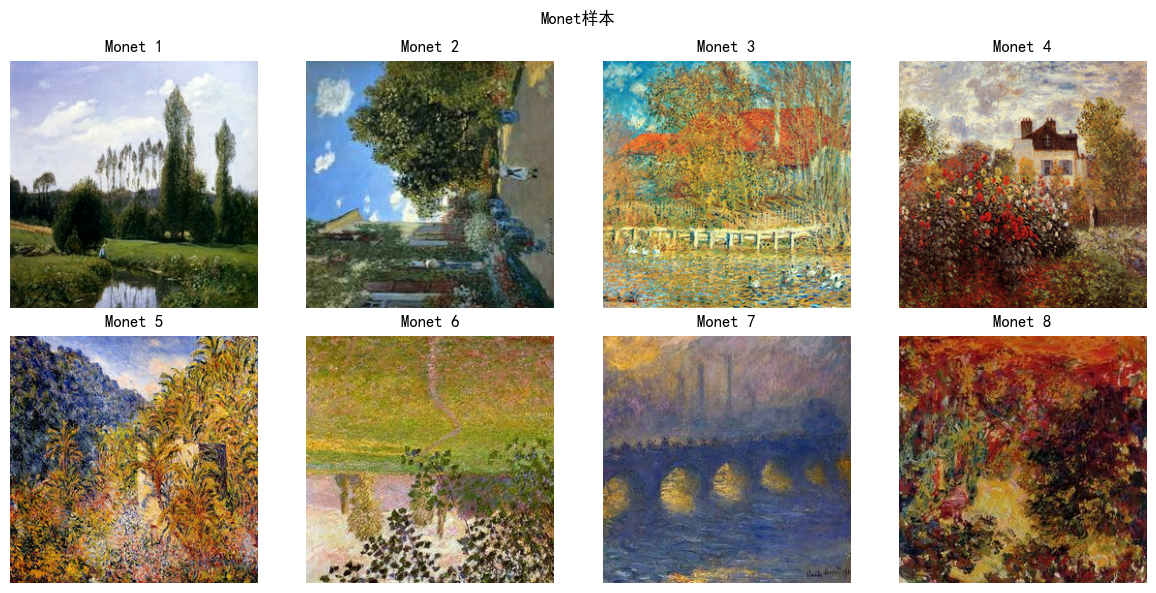

PhotoÊ†∑Êú¨:


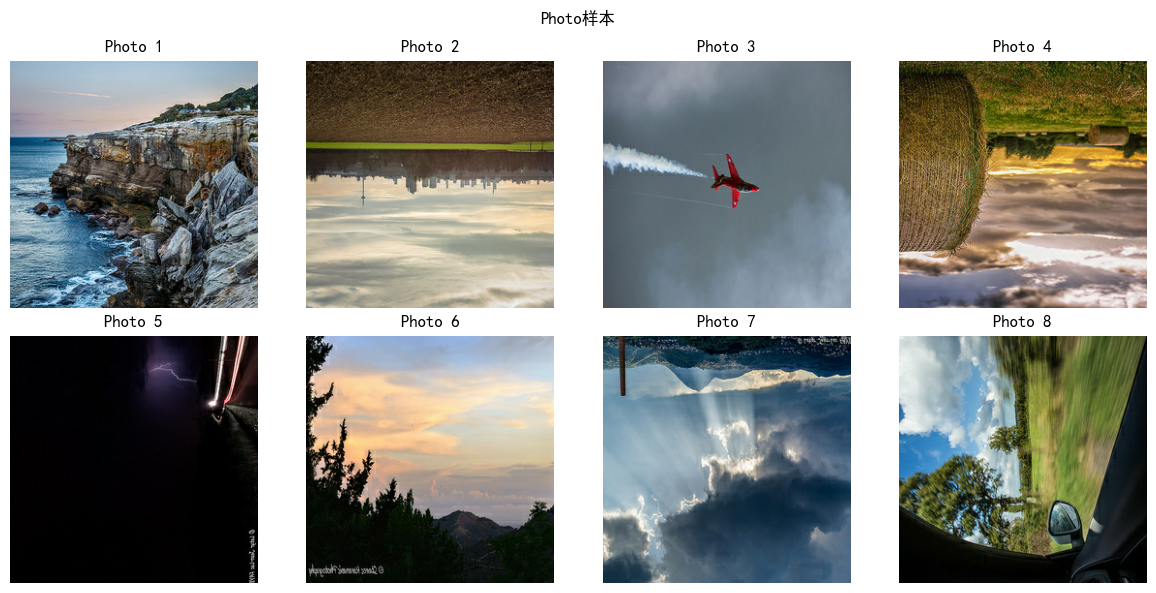

In [5]:
# ÊòæÁ§∫MonetÊ†∑Êú¨
print("MonetÊ†∑Êú¨:")
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for i, (monet, photo) in enumerate(dataset.take(8)):
    axes[i].imshow(monet[0] * 0.5 + 0.5)
    axes[i].set_title(f'Monet {i+1}')
    axes[i].axis('off')

plt.suptitle('MonetÊ†∑Êú¨')
plt.tight_layout()
plt.show()

# ÊòæÁ§∫PhotoÊ†∑Êú¨
print("PhotoÊ†∑Êú¨:")
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for i, (monet, photo) in enumerate(dataset.take(8)):
    axes[i].imshow(photo[0] * 0.5 + 0.5)
    axes[i].set_title(f'Photo {i+1}')
    axes[i].axis('off')

plt.suptitle('PhotoÊ†∑Êú¨')
plt.tight_layout()
plt.show()


## 6. Ê®°ÂûãÂÆö‰πâ


In [6]:
import tensorflow as tf

def InstanceNorm():
    """Ëá™ÂÆö‰πâ InstanceNormalization Êõø‰ª£Áâà"""
    # Áõ¥Êé•Áî® LayerNormalization Ëøë‰ººÊõø‰ª£ÔºàÂØπÊØè‰∏™Ê†∑Êú¨Áã¨Á´ãÂΩí‰∏ÄÂåñÔºâ
    return tf.keras.layers.LayerNormalization(axis=[1, 2], epsilon=1e-5)

def downsample(filters, size, apply_instancenorm=True, strides=2):
    """‰∏ãÈááÊ†∑Â±Ç"""
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(tf.keras.layers.Conv2D(filters, size, strides=strides, padding='same',
                                     kernel_initializer=initializer, use_bias=False))

    if apply_instancenorm:
        result.add(InstanceNorm())

    result.add(tf.keras.layers.LeakyReLU())

    return result

def upsample(filters, size, apply_dropout=False, strides=2):
    """‰∏äÈááÊ†∑Â±Ç"""
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=strides, padding='same',
                                              kernel_initializer=initializer, use_bias=False))

    result.add(InstanceNorm())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

    result.add(tf.keras.layers.ReLU())

    return result

def Generator():
    """ÁîüÊàêÂô®ÔºàU-NetÊû∂ÊûÑÔºâ"""
    inputs = tf.keras.layers.Input(shape=[IMAGE_SIZE, IMAGE_SIZE, CHANNELS])

    down_stack = [
        downsample(64, 4, apply_instancenorm=False),
        downsample(128, 4),
        downsample(256, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4),
        upsample(256, 4),
        upsample(128, 4),
        upsample(64, 4),
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(CHANNELS, 4,
                                          strides=2,
                                          padding='same',
                                          kernel_initializer=initializer,
                                          activation='tanh')

    x = inputs
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)
    skips = reversed(skips[:-1])

    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

def Discriminator():
    """Âà§Âà´Âô®ÔºàPatchGANÊû∂ÊûÑÔºâ"""
    initializer = tf.random_normal_initializer(0., 0.02)

    inp = tf.keras.layers.Input(shape=[IMAGE_SIZE, IMAGE_SIZE, CHANNELS], name='input_image')
    x = inp

    down1 = downsample(64, 4, False)(x)
    down2 = downsample(128, 4)(down1)
    down3 = downsample(256, 4)(down2)

    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)
    conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                 kernel_initializer=initializer,
                                 use_bias=False)(zero_pad1)

    norm1 = InstanceNorm()(conv)
    leaky_relu = tf.keras.layers.LeakyReLU()(norm1)
    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)

    last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                 kernel_initializer=initializer)(zero_pad2)

    return tf.keras.Model(inputs=inp, outputs=last)

print("‚úÖ Ê®°ÂûãÂÆö‰πâÂÆåÊàêÔºàÊó†ÈúÄ tensorflow_addonsÔºâ")



‚úÖ Ê®°ÂûãÂÆö‰πâÂÆåÊàêÔºàÊó†ÈúÄ tensorflow_addonsÔºâ


In [7]:
# ÂàõÂª∫Ê®°Âûã
print("üèóÔ∏è ÂàõÂª∫Ê®°Âûã...")
monet_generator = Generator()
photo_generator = Generator()
monet_discriminator = Discriminator()
photo_discriminator = Discriminator()

print(f"ÁîüÊàêÂô®ÂèÇÊï∞Èáè: {monet_generator.count_params():,}")
print(f"Âà§Âà´Âô®ÂèÇÊï∞Èáè: {monet_discriminator.count_params():,}")

print("‚úÖ Ê®°ÂûãÂàõÂª∫ÂÆåÊàê")


üèóÔ∏è ÂàõÂª∫Ê®°Âûã...
ÁîüÊàêÂô®ÂèÇÊï∞Èáè: 54,458,709
Âà§Âà´Âô®ÂèÇÊï∞Èáè: 2,775,939
‚úÖ Ê®°ÂûãÂàõÂª∫ÂÆåÊàê


## 8. ÊçüÂ§±ÂáΩÊï∞ÂÆö‰πâ


In [8]:
def discriminator_loss(real, generated):
    """Âà§Âà´Âô®ÊçüÂ§±ÂáΩÊï∞"""
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(
        tf.ones_like(real), real)
    generated_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(
        tf.zeros_like(generated), generated)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss * 0.5

def generator_loss(generated):
    """ÁîüÊàêÂô®ÊçüÂ§±ÂáΩÊï∞"""
    return tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(
        tf.ones_like(generated), generated)

def calc_cycle_loss(real_image, cycled_image, LAMBDA):
    """Âæ™ÁéØ‰∏ÄËá¥ÊÄßÊçüÂ§±"""
    loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
    return LAMBDA * loss1

def identity_loss(real_image, same_image, LAMBDA):
    """ÊÅíÁ≠âÊçüÂ§±"""
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return LAMBDA * 0.5 * loss

print("‚úÖ ÊçüÂ§±ÂáΩÊï∞ÂÆö‰πâÂÆåÊàê")


‚úÖ ÊçüÂ§±ÂáΩÊï∞ÂÆö‰πâÂÆåÊàê


## 9. CycleGANÊ®°ÂûãÁ±ª


In [9]:
class CycleGAN(tf.keras.Model):
    """CycleGANÊ®°Âûã"""
    
    def __init__(self, monet_generator, photo_generator, monet_discriminator, photo_discriminator, lambda_cycle=10.0):
        super(CycleGAN, self).__init__()
        self.m_gen = monet_generator
        self.p_gen = photo_generator
        self.m_disc = monet_discriminator
        self.p_disc = photo_discriminator
        self.lambda_cycle = lambda_cycle

    def compile(self, m_gen_optimizer, p_gen_optimizer, m_disc_optimizer, p_disc_optimizer,
                gen_loss_fn, disc_loss_fn, cycle_loss_fn, identity_loss_fn):
        super(CycleGAN, self).compile()
        self.m_gen_optimizer = m_gen_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.m_disc_optimizer = m_disc_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn

    def train_step(self, batch_data):
        real_monet, real_photo = batch_data
        
        batch_size = tf.shape(real_monet)[0]
        
        with tf.GradientTape(persistent=True) as tape:
            # Photo -> Monet -> Photo
            fake_monet = self.m_gen(real_photo, training=True)
            cycled_photo = self.p_gen(fake_monet, training=True)

            # Monet -> Photo -> Monet
            fake_photo = self.p_gen(real_monet, training=True)
            cycled_monet = self.m_gen(fake_photo, training=True)

            # Identity loss
            same_monet = self.m_gen(real_monet, training=True)
            same_photo = self.p_gen(real_photo, training=True)

            # Discriminator outputs
            disc_real_monet = self.m_disc(real_monet, training=True)
            disc_fake_monet = self.m_disc(fake_monet, training=True)
            disc_real_photo = self.p_disc(real_photo, training=True)
            disc_fake_photo = self.p_disc(fake_photo, training=True)

            # Generator losses
            monet_gen_loss = self.gen_loss_fn(disc_fake_monet)
            photo_gen_loss = self.gen_loss_fn(disc_fake_photo)

            # Cycle consistency loss
            total_cycle_loss = (self.cycle_loss_fn(real_monet, cycled_monet, self.lambda_cycle) + 
                               self.cycle_loss_fn(real_photo, cycled_photo, self.lambda_cycle))

            # Identity loss
            total_monet_gen_loss = (monet_gen_loss + total_cycle_loss + 
                                   self.identity_loss_fn(real_monet, same_monet, self.lambda_cycle))
            total_photo_gen_loss = (photo_gen_loss + total_cycle_loss + 
                                   self.identity_loss_fn(real_photo, same_photo, self.lambda_cycle))

            # Discriminator losses
            monet_disc_loss = self.disc_loss_fn(disc_real_monet, disc_fake_monet)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)

        # Calculate gradients
        monet_gen_grads = tape.gradient(total_monet_gen_loss, self.m_gen.trainable_variables)
        photo_gen_grads = tape.gradient(total_photo_gen_loss, self.p_gen.trainable_variables)
        monet_disc_grads = tape.gradient(monet_disc_loss, self.m_disc.trainable_variables)
        photo_disc_grads = tape.gradient(photo_disc_loss, self.p_disc.trainable_variables)

        # Apply gradients
        self.m_gen_optimizer.apply_gradients(zip(monet_gen_grads, self.m_gen.trainable_variables))
        self.p_gen_optimizer.apply_gradients(zip(photo_gen_grads, self.p_gen.trainable_variables))
        self.m_disc_optimizer.apply_gradients(zip(monet_disc_grads, self.m_disc.trainable_variables))
        self.p_disc_optimizer.apply_gradients(zip(photo_disc_grads, self.p_disc.trainable_variables))
        
        return {
            'monet_gen_loss': total_monet_gen_loss,
            'photo_gen_loss': total_photo_gen_loss,
            'monet_disc_loss': monet_disc_loss,
            'photo_disc_loss': photo_disc_loss,
            'total_cycle_loss': total_cycle_loss
        }

print("‚úÖ CycleGANÊ®°ÂûãÁ±ªÂÆö‰πâÂÆåÊàê")


‚úÖ CycleGANÊ®°ÂûãÁ±ªÂÆö‰πâÂÆåÊàê


## 10. ÂàõÂª∫‰ºòÂåñÂô®ÂíåÁºñËØëÊ®°Âûã


In [10]:
# ÂàõÂª∫‰ºòÂåñÂô®
print("‚öôÔ∏è ÈÖçÁΩÆ‰ºòÂåñÂô®...")
monet_gen_optimizer = tf.keras.optimizers.Adam(LEARNING_RATE, beta_1=BETA_1)
photo_gen_optimizer = tf.keras.optimizers.Adam(LEARNING_RATE, beta_1=BETA_1)
monet_disc_optimizer = tf.keras.optimizers.Adam(LEARNING_RATE, beta_1=BETA_1)
photo_disc_optimizer = tf.keras.optimizers.Adam(LEARNING_RATE, beta_1=BETA_1)

# ÂàõÂª∫CycleGANÊ®°Âûã
cyclegan = CycleGAN(
    monet_generator=monet_generator,
    photo_generator=photo_generator,
    monet_discriminator=monet_discriminator,
    photo_discriminator=photo_discriminator,
    lambda_cycle=LAMBDA_CYCLE
)

# ÁºñËØëÊ®°Âûã
cyclegan.compile(
    m_gen_optimizer=monet_gen_optimizer,
    p_gen_optimizer=photo_gen_optimizer,
    m_disc_optimizer=monet_disc_optimizer,
    p_disc_optimizer=photo_disc_optimizer,
    gen_loss_fn=generator_loss,
    disc_loss_fn=discriminator_loss,
    cycle_loss_fn=calc_cycle_loss,
    identity_loss_fn=identity_loss
)

print("‚úÖ Ê®°ÂûãÁºñËØëÂÆåÊàê")


‚öôÔ∏è ÈÖçÁΩÆ‰ºòÂåñÂô®...
‚úÖ Ê®°ÂûãÁºñËØëÂÆåÊàê


## 11. ÂºÄÂßãËÆ≠ÁªÉ

**ËÆ≠ÁªÉÂèØËÉΩÈúÄË¶ÅËæÉÈïøÊó∂Èó¥ÔºåËØ∑ËÄêÂøÉÁ≠âÂæÖ**


In [11]:
# ÂàõÂª∫‰øùÂ≠òÁõÆÂΩï
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
save_dir = os.path.join(SAVE_DIR, f"{MODEL_NAME}_{timestamp}")
os.makedirs(save_dir, exist_ok=True)
print(f"Ê®°ÂûãÂ∞Ü‰øùÂ≠òÂà∞: {save_dir}")

# ËÆ°ÁÆóËÆ≠ÁªÉÊ≠•Êï∞
steps_per_epoch = max(n_monet, n_photo) // BATCH_SIZE
print(f"ÊØèËΩÆÊ≠•Êï∞: {steps_per_epoch}")
print(f"ÊÄªÊ≠•Êï∞: {steps_per_epoch * EPOCHS}")

# ÂàõÂª∫ÂõûË∞É
class LogCallback(tf.keras.callbacks.Callback):
    def __init__(self, log_interval=50):
        super().__init__()
        self.log_interval = log_interval
    
    def on_batch_end(self, batch, logs=None):
        if batch % self.log_interval == 0:
            print(f"Batch {batch}: "
              f"Monet Gen Loss: {np.mean(logs['monet_gen_loss']):.4f}, "
              f"Photo Gen Loss: {np.mean(logs['photo_gen_loss']):.4f}, "
              f"Monet Disc Loss: {np.mean(logs['monet_disc_loss']):.4f}, "
              f"Photo Disc Loss: {np.mean(logs['photo_disc_loss']):.4f}, "
              f"Cycle Loss: {np.mean(logs['total_cycle_loss']):.4f})")



callbacks = [
    LogCallback(log_interval=50),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_dir, "checkpoint.weights.h5"),
        save_weights_only=True,
        save_best_only=False,
        verbose=1
    )
]

# ÂºÄÂßãËÆ≠ÁªÉ
print("üöÄ ÂºÄÂßãËÆ≠ÁªÉ...")
print("=" * 50)

history = cyclegan.fit(
    dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    verbose=1,
    callbacks=callbacks
)

print("‚úÖ ËÆ≠ÁªÉÂÆåÊàêÔºÅ")


Ê®°ÂûãÂ∞Ü‰øùÂ≠òÂà∞: saves\cyclegan_monet_20251026_204812
ÊØèËΩÆÊ≠•Êï∞: 879
ÊÄªÊ≠•Êï∞: 17580
üöÄ ÂºÄÂßãËÆ≠ÁªÉ...
Epoch 1/20
Batch 0: Monet Gen Loss: 13.1476, Photo Gen Loss: 13.9626, Monet Disc Loss: 0.8465, Photo Disc Loss: 0.8525, Cycle Loss: 10.2132)
 50/879 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37:17 3s/step - monet_disc_loss: 0.7696 - monet_gen_loss: 7.7189 - photo_disc_loss: 0.7652 - photo_gen_loss: 7.9278 - total_cycle_loss: 5.6844Batch 50: Monet Gen Loss: 6.1083, Photo Gen Loss: 6.4628, Monet Disc Loss: 0.7415, Photo Disc Loss: 0.7500, Cycle Loss: 4.5478)
100/879 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35:47 3s/step - monet_disc_loss: 0.7211 - monet_gen_loss: 6.2759 - photo_disc_loss: 0.7212 - photo_gen_loss: 6.3913 - total_cycle_loss: 4.4933Batch 100: Monet Gen Loss: 4.9850, Photo Gen Loss: 4.8908, Monet Disc Loss: 0.6514, Photo Disc Loss: 0.6545, Cycle Loss: 3.3651)
117/879 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

KeyboardInterrupt: 

In [14]:
# ÂàõÂª∫‰øùÂ≠òÁõÆÂΩï
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
save_dir = os.path.join(SAVE_DIR, f"{MODEL_NAME}_{timestamp}")
os.makedirs(save_dir, exist_ok=True)
print(f"Ê®°ÂûãÂ∞Ü‰øùÂ≠òÂà∞: {save_dir}")

# ËÆ°ÁÆóËÆ≠ÁªÉÊ≠•Êï∞
steps_per_epoch = max(n_monet, n_photo) // BATCH_SIZE
print(f"ÊØèËΩÆÊ≠•Êï∞: {steps_per_epoch}")
print(f"ÊÄªÊ≠•Êï∞: {steps_per_epoch * EPOCHS}")

# Ê£ÄÊü•GPUÁä∂ÊÄÅ
gpus = tf.config.list_physical_devices('GPU')
USE_GPU = len(gpus) > 0

# ‰øÆÂ§çÂêéÁöÑÂõûË∞ÉÂáΩÊï∞
class LogCallback(tf.keras.callbacks.Callback):
    def __init__(self, log_interval=50):
        super().__init__()
        self.log_interval = log_interval
        self.batch_count = 0
    
    def on_train_batch_end(self, batch, logs=None):
        self.batch_count += 1
        if self.batch_count % self.log_interval == 0:
            if logs:
                monet_gen = logs.get('monet_gen_loss', 0)
                photo_gen = logs.get('photo_gen_loss', 0)
                monet_disc = logs.get('monet_disc_loss', 0)
                photo_disc = logs.get('photo_disc_loss', 0)
                cycle = logs.get('total_cycle_loss', 0)
                
                print(f"\nBatch {self.batch_count}: "
                      f"MG={monet_gen:.4f}, PG={photo_gen:.4f}, "
                      f"MD={monet_disc:.4f}, PD={photo_disc:.4f}, Cyc={cycle:.4f}")
    
    def on_epoch_end(self, epoch, logs=None):
        print(f"\n{'='*60}")
        print(f"Epoch {epoch + 1}/{EPOCHS} ÂÆåÊàê")
        if logs:
            for key, value in logs.items():
                print(f"  {key}: {value:.4f}")
        print(f"{'='*60}\n")

# Ëá™ÂÆö‰πâ‰øùÂ≠òÂõûË∞É - ÈÄÇÈÖç‰Ω†ÁöÑÊ®°ÂûãÁªìÊûÑ
class SafeModelCheckpoint(tf.keras.callbacks.Callback):
    def __init__(self, save_dir, save_freq='epoch'):
        super().__init__()
        self.save_dir = save_dir
        self.save_freq = save_freq
        self.epoch_count = 0
    
    def on_epoch_end(self, epoch, logs=None):
        self.epoch_count += 1
        try:
            # Â∞ùËØï‰∏çÂêåÁöÑÂ±ûÊÄßÂêçÁß∞
            if hasattr(self.model, 'monet_generator'):
                monet_gen = self.model.monet_generator
                photo_gen = self.model.photo_generator
            elif hasattr(self.model, 'm_gen'):
                monet_gen = self.model.m_gen
                photo_gen = self.model.p_gen
            elif hasattr(self.model, 'gen_G'):
                monet_gen = self.model.gen_G
                photo_gen = self.model.gen_F
            else:
                # Â¶ÇÊûúÊâæ‰∏çÂà∞ÔºåÂ∞ùËØï‰øùÂ≠òÊï¥‰∏™Ê®°Âûã
                model_path = os.path.join(self.save_dir, f'cyclegan_epoch{self.epoch_count}.h5')
                self.model.save_weights(model_path)
                print(f"‚úÖ Epoch {self.epoch_count} ÂÆåÊï¥Ê®°ÂûãÂ∑≤‰øùÂ≠ò")
                return
            
            monet_gen_path = os.path.join(self.save_dir, f'monet_gen_epoch{self.epoch_count}.h5')
            photo_gen_path = os.path.join(self.save_dir, f'photo_gen_epoch{self.epoch_count}.h5')
            
            monet_gen.save_weights(monet_gen_path)
            photo_gen.save_weights(photo_gen_path)
            print(f"‚úÖ Epoch {self.epoch_count} ÁîüÊàêÂô®Â∑≤‰øùÂ≠ò")
        except Exception as e:
            print(f"‚ö†Ô∏è ‰øùÂ≠òÂ§±Ë¥•: {e}")

# ÊûÑÂª∫Ê®°ÂûãÔºàÈÄÇÈÖç‰∏çÂêåÁöÑÊ®°ÂûãÁªìÊûÑÔºâ
print("\nÊûÑÂª∫Ê®°Âûã...")
try:
    sample_monet = next(iter(monet_ds.take(1)))
    sample_photo = next(iter(photo_ds.take(1)))
    
    # Â∞ùËØï‰∏çÂêåÁöÑÂ±ûÊÄßËÆøÈóÆÊñπÂºè
    if hasattr(cyclegan, 'monet_generator'):
        _ = cyclegan.monet_generator(sample_photo, training=False)
        _ = cyclegan.photo_generator(sample_monet, training=False)
        _ = cyclegan.monet_discriminator(sample_monet, training=False)
        _ = cyclegan.photo_discriminator(sample_photo, training=False)
    elif hasattr(cyclegan, 'm_gen'):
        _ = cyclegan.m_gen(sample_photo, training=False)
        _ = cyclegan.p_gen(sample_monet, training=False)
        _ = cyclegan.m_disc(sample_monet, training=False)
        _ = cyclegan.p_disc(sample_photo, training=False)
    else:
        # Áõ¥Êé•Ë∞ÉÁî®Ê®°Âûã
        _ = cyclegan((sample_monet, sample_photo), training=False)
    
    print("‚úÖ Ê®°ÂûãÊûÑÂª∫ÊàêÂäü")
except Exception as e:
    print(f"‚ö†Ô∏è ÊûÑÂª∫Ë≠¶Âëä: {e}")
    print("Ê®°ÂûãÂ∞ÜÂú®ËÆ≠ÁªÉÊó∂Ëá™Âä®ÊûÑÂª∫")

# ÂàõÂª∫ÂõûË∞É
callbacks = [
    LogCallback(log_interval=50),
    SafeModelCheckpoint(save_dir=save_dir),
]

# ÂºÄÂßãËÆ≠ÁªÉ
print("\n" + "="*70)
print("üöÄ ÂºÄÂßãËÆ≠ÁªÉ...")
print("="*70)
print(f"ËÆæÂ§á: {'GPU' if USE_GPU else 'CPU'}")
print(f"ÂõæÂÉè: {IMAGE_SIZE}x{IMAGE_SIZE}, Batch: {BATCH_SIZE}")
print(f"Ê≠•Êï∞: {steps_per_epoch}/epoch, ÊÄªËÆ°: {steps_per_epoch * EPOCHS}")
print("="*70 + "\n")

try:
    history = cyclegan.fit(
        dataset,
        steps_per_epoch=steps_per_epoch,
        epochs=EPOCHS,
        verbose=1,
        callbacks=callbacks
    )
    
    print("\n" + "="*70)
    print("‚úÖ ËÆ≠ÁªÉÂÆåÊàêÔºÅ")
    print("="*70)
    
    # ‰øùÂ≠òÊúÄÁªàÊ®°Âûã - ÈÄÇÈÖç‰∏çÂêåÁªìÊûÑ
    try:
        if hasattr(cyclegan, 'monet_generator'):
            final_monet = os.path.join(save_dir, 'monet_generator_final.h5')
            final_photo = os.path.join(save_dir, 'photo_generator_final.h5')
            cyclegan.monet_generator.save_weights(final_monet)
            cyclegan.photo_generator.save_weights(final_photo)
        else:
            # ‰øùÂ≠òÊï¥‰∏™Ê®°Âûã
            final_model = os.path.join(save_dir, 'cyclegan_final.h5')
            cyclegan.save_weights(final_model)
        print(f"‚úÖ ÊúÄÁªàÊ®°ÂûãÂ∑≤‰øùÂ≠ò: {save_dir}")
    except Exception as e:
        print(f"‚ö†Ô∏è ‰øùÂ≠òÊúÄÁªàÊ®°ÂûãÂ§±Ë¥•: {e}")
    
    # ‰øùÂ≠òÂéÜÂè≤
    try:
        with open(os.path.join(save_dir, 'history.pkl'), 'wb') as f:
            pickle.dump(history.history, f)
        print(f"‚úÖ ËÆ≠ÁªÉÂéÜÂè≤Â∑≤‰øùÂ≠ò")
    except:
        pass
    
except KeyboardInterrupt:
    print("\n‚ö†Ô∏è ËÆ≠ÁªÉ‰∏≠Êñ≠Ôºå‰øùÂ≠òÂΩìÂâçÊ®°Âûã...")
    try:
        cyclegan.save_weights(os.path.join(save_dir, 'cyclegan_interrupted.h5'))
        print("‚úÖ Â∑≤‰øùÂ≠ò")
    except Exception as e:
        print(f"‚ö†Ô∏è ‰øùÂ≠òÂ§±Ë¥•: {e}")
    
except Exception as e:
    print(f"\n‚ùå ËÆ≠ÁªÉÂá∫Èîô: {e}")
    import traceback
    traceback.print_exc()

print("\nËÆ≠ÁªÉËÑöÊú¨ÂÆåÊàê")

Ê®°ÂûãÂ∞Ü‰øùÂ≠òÂà∞: saves\cyclegan_monet_20251026_232450
ÊØèËΩÆÊ≠•Êï∞: 879
ÊÄªÊ≠•Êï∞: 17580

ÊûÑÂª∫Ê®°Âûã...
‚úÖ Ê®°ÂûãÊûÑÂª∫ÊàêÂäü

üöÄ ÂºÄÂßãËÆ≠ÁªÉ...
ËÆæÂ§á: CPU
ÂõæÂÉè: 256x256, Batch: 8
Ê≠•Êï∞: 879/epoch, ÊÄªËÆ°: 17580

Epoch 1/20
  3/879 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38:09 3s/step - monet_disc_loss: 0.6247 - monet_gen_loss: 4.5250 - photo_disc_loss: 0.6405 - photo_gen_loss: 4.4242 - total_cycle_loss: 2.9072
‚ö†Ô∏è ËÆ≠ÁªÉ‰∏≠Êñ≠Ôºå‰øùÂ≠òÂΩìÂâçÊ®°Âûã...
‚ö†Ô∏è ‰øùÂ≠òÂ§±Ë¥•: The filename must end in `.weights.h5`. Received: filepath=saves\cyclegan_monet_20251026_232450\cyclegan_interrupted.h5

ËÆ≠ÁªÉËÑöÊú¨ÂÆåÊàê


## 12. ÂèØËßÜÂåñËÆ≠ÁªÉÂéÜÂè≤


In [ ]:
# ÁªòÂà∂ËÆ≠ÁªÉÂéÜÂè≤
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Generator Loss
axes[0, 0].plot(history.history['monet_gen_loss'], label='Monet Gen')
axes[0, 0].plot(history.history['photo_gen_loss'], label='Photo Gen')
axes[0, 0].set_title('Generator Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Discriminator Loss
axes[0, 1].plot(history.history['monet_disc_loss'], label='Monet Disc')
axes[0, 1].plot(history.history['photo_disc_loss'], label='Photo Disc')
axes[0, 1].set_title('Discriminator Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Cycle Loss
axes[1, 0].plot(history.history['total_cycle_loss'], label='Cycle Loss')
axes[1, 0].set_title('Cycle Consistency Loss')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Combined Loss
axes[1, 1].plot(history.history['monet_gen_loss'], label='Monet Gen')
axes[1, 1].plot(history.history['photo_gen_loss'], label='Photo Gen')
axes[1, 1].plot(history.history['monet_disc_loss'], label='Monet Disc')
axes[1, 1].plot(history.history['photo_disc_loss'], label='Photo Disc')
axes[1, 1].set_title('All Losses')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


## 13. ÊòæÁ§∫ÁîüÊàêÁªìÊûú


In [ ]:
# ÊòæÁ§∫ÁîüÊàêÁöÑÊ†∑Êú¨
print("üé® ÊòæÁ§∫ÁîüÊàêÊ†∑Êú¨...")
fig, axes = plt.subplots(2, 8, figsize=(16, 4))

photo_dataset = dataset.map(lambda x, y: y)  # ÊèêÂèñphotoÈÉ®ÂàÜ

for i, photo in enumerate(photo_dataset.take(8)):
    # ÂéüÂßãÁÖßÁâá
    axes[0, i].imshow(photo[0] * 0.5 + 0.5)
    axes[0, i].set_title(f'Original {i+1}')
    axes[0, i].axis('off')
    
    # ÁîüÊàêÁöÑMonetÈ£éÊ†º
    generated = monet_generator(photo, training=False)
    axes[1, i].imshow(generated[0] * 0.5 + 0.5)
    axes[1, i].set_title(f'Generated {i+1}')
    axes[1, i].axis('off')

plt.suptitle('Photo to Monet Style Transfer')
plt.tight_layout()
plt.show()


## 14. ‰øùÂ≠òÊ®°Âûã


In [ ]:
# ‰øùÂ≠òÊ®°Âûã
print("üíæ ‰øùÂ≠òÊ®°Âûã...")
monet_generator.save(os.path.join(save_dir, "monet_generator.h5"))
photo_generator.save(os.path.join(save_dir, "photo_generator.h5"))
monet_discriminator.save(os.path.join(save_dir, "monet_discriminator.h5"))
photo_discriminator.save(os.path.join(save_dir, "photo_discriminator.h5"))

print("‚úÖ Ê®°Âûã‰øùÂ≠òÂÆåÊàê")
print(f"Ê®°Âûã‰øùÂ≠òË∑ØÂæÑ: {save_dir}")


## 15. ÁîüÊàêÊèê‰∫§Êñá‰ª∂


In [ ]:
from PIL import Image
import shutil

# ÂàõÂª∫È¢ÑÊµãÊï∞ÊçÆÈõÜÔºàÂçïÂº†ÂõæÂÉèÊâπÊ¨°Ôºâ
photo_files = tf.io.gfile.glob(os.path.join(PHOTO_TFREC_PATH, "*.tfrec"))
photo_ds_predict = load_dataset(photo_files)
photo_ds_predict = photo_ds_predict.batch(1)  # ÂçïÂº†ÂõæÂÉèÊâπÊ¨°

# ÂàõÂª∫ËæìÂá∫ÁõÆÂΩï
output_dir = os.path.join(save_dir, "submission_images")
os.makedirs(output_dir, exist_ok=True)

# ÁîüÊàêÂõæÂÉè
print("üé® ÁîüÊàêÊèê‰∫§ÂõæÂÉè...")
count = 0

for photo in photo_ds_predict:
    # ÁîüÊàêMonetÈ£éÊ†ºÂõæÂÉè
    generated = monet_generator(photo, training=False)
    
    # ËΩ¨Êç¢‰∏∫PILÂõæÂÉèÂπ∂‰øùÂ≠ò
    img_array = (generated[0].numpy() * 127.5 + 127.5).astype(np.uint8)
    img = Image.fromarray(img_array)
    img.save(os.path.join(output_dir, f'{count+1}.jpg'))
    
    count += 1
    
    if count % 100 == 0:
        print(f"Â∑≤ÁîüÊàê {count} Âº†ÂõæÂÉè")

print(f"ÊÄªÂÖ±ÁîüÊàê‰∫Ü {count} Âº†ÂõæÂÉè")

# ÂàõÂª∫ZIPÊñá‰ª∂
zip_path = shutil.make_archive(output_dir, 'zip', output_dir)
zip_size = os.path.getsize(zip_path) / (1024 * 1024)

print(f"ZIPÊñá‰ª∂Â∑≤ÂàõÂª∫: {zip_path}")
print(f"Êñá‰ª∂Â§ßÂ∞è: {zip_size:.2f} MB")

# È™åËØÅÁªìÊûú
if count < 7000:
    print("‚ö†Ô∏è Ë≠¶Âëä: ÂõæÂÉèÊï∞ÈáèÂ∞ë‰∫é7000Âº†ÔºÅ")
elif count > 10000:
    print("‚ö†Ô∏è Ë≠¶Âëä: ÂõæÂÉèÊï∞ÈáèË∂ÖËøá10000Âº†ÔºÅ")
else:
    print("‚úÖ ÂõæÂÉèÊï∞ÈáèÁ¨¶ÂêàË¶ÅÊ±Ç (7000-10000Âº†)")

print(f"\nüéâ Êèê‰∫§Êñá‰ª∂Â∑≤ÁîüÊàê: {zip_path}")
print("ËØ∑Â∞ÜÊ≠§Êñá‰ª∂‰∏ä‰º†Âà∞KaggleÁ´ûËµõÈ°µÈù¢")


## ÂÆåÊàêÔºÅ

‰Ω†ÁöÑCycleGANÊ®°ÂûãÂ∑≤ÁªèËÆ≠ÁªÉÂÆåÊàêÔºåÊèê‰∫§Êñá‰ª∂Â∑≤ÁîüÊàêÔºÅ

### üìä ËÆ≠ÁªÉÊÄªÁªì

- ‚úÖ Ê®°ÂûãËÆ≠ÁªÉÂÆåÊàê
- ‚úÖ ËÆ≠ÁªÉÂéÜÂè≤Â∑≤ÂèØËßÜÂåñ
- ‚úÖ ÁîüÊàêÊ†∑Êú¨Â∑≤Â±ïÁ§∫
- ‚úÖ Ê®°ÂûãÂ∑≤‰øùÂ≠ò
- ‚úÖ Êèê‰∫§Êñá‰ª∂Â∑≤ÁîüÊàê

### üéØ ‰∏ã‰∏ÄÊ≠•

1. ÊâæÂà∞ÁîüÊàêÁöÑZIPÊñá‰ª∂ÔºàÂú®savesÁõÆÂΩï‰∏ãÔºâ
2. ‰∏ä‰º†Âà∞KaggleÁ´ûËµõÈ°µÈù¢
3. Á≠âÂæÖËØÑ‰º∞ÁªìÊûú

### üí° ‰ºòÂåñÂª∫ËÆÆ

- Â¶ÇÊûúÊÉ≥Ëé∑ÂæóÊõ¥Â•ΩÁöÑÊïàÊûúÔºåÂèØ‰ª•Â¢ûÂä†ËÆ≠ÁªÉËΩÆÊï∞ÔºàEPOCHSÔºâ
- ÂèØ‰ª•Â∞ùËØï‰∏çÂêåÁöÑË∂ÖÂèÇÊï∞ÁªÑÂêà
- ÂèØ‰ª•Ê∑ªÂä†Êõ¥Â§öÁöÑÊï∞ÊçÆÂ¢ûÂº∫ÊäÄÊúØ

### üìÅ Êñá‰ª∂ËØ¥Êòé

- `monet_generator.h5`: ËÆ≠ÁªÉÂ•ΩÁöÑMonetÁîüÊàêÂô®
- `submission_images.zip`: KaggleÊèê‰∫§Êñá‰ª∂
- `checkpoint.h5`: ËÆ≠ÁªÉÊ£ÄÊü•ÁÇπ

**Á•ù‰Ω†Á´ûËµõÊàêÂäüÔºÅ** üé®üèÜ
